In [28]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np
import mxnet as mx
import random as rand
from sklearn.datasets.samples_generator import make_blobs
from utils import *
np.set_printoptions(precision=3)

# An Analysis of Mini Batch Gradient Decent

## Origin of Method

$\;\;\;\;\;\;$ Mini batch gradient decent is a common machine learning algorithim used to optimize a given problem. The methodology of mini batch decent originates from the need to minimize the computation of gradient decent for large datasets. Originating from the idea of stochastic gradient decent, mini batch gradient decent computes a gradient for a set batch size of data points for each iteration, rather than just a single point. This method is the most widely used form of gradient decent for machine learning as batching generally leads to a more stable convergence and the computational cost for computing the gradient is smaller.

## Description of Technique
$\;\;\;\;\;\;$Mini batch gradient decent is a method that randomly samples a batch size of data points and computes the gradient of the batch for each iteration. The generic gradient decent method is slow to evaluate large datasets as it required evaluating the gradients over the entire dataset. On the other hand, Stochastic gradient decent computes the gradient for a single sample of data, but the frequency of updates is computationally expensive and calculations are sensitive to noisy data. Mini batch gradient decent looks to minimize the downsides of both of these methods by batching as computing the gradient is easier and the convergence towards and optimum is smoother. 

$\;\;\;\;\;\;$In order to better understand the equation for mini batch gradient decent, let us first look at the general equation for stochastic gradient decent. The equation is as follows:


![title](general_eq.png)
where $f_{i}(x)$ is a loss function based on the training data instance indexed by $i$ and $n$ is the size of the dataset. The computational cost linearly related to the size of $n$. The function is simply the sum of a finite number of functions.


Within each iteration of stochastic gradient decent, the gradient is computed by taking a random sample i and computing the gradient for that point. This is can be used to estimate the total gradient since

![title](gradient_eq.png)
Instead of computing the gradient of a given sample $i$, mini batch gradient decent computes the gradient over a set of samples of a given batch size. The equation to compute the gradient of a batch is as follows:

![title](minibatch_eq.png)
Where $|B|$ is the cardinality of the batch. As the $|B|$ increases, so does the cost to compute the gradient. This can be used to update the current weights of a given solution each iteration by the following equation

![title](minibatch_update.png)
Where $x$ is the weight matrix we are looking to optimize and $η$ is a predefined learning rate. Since the gradient of the batch is an unbiased estimator for the total gradient, we can use the the estimated gradient the same way stochastic gradient decent uses its gradient approximation.

Because the stochastic gradient decent and mini batch gradient decent share the similar idea of estimating the gradient to reduce computation time, mini batch is a stochastic method and is sometimes referred to in machine learning as stochastic gradient decent.

$\;\;\;\;\;\;$When implementing an algoritim using the mini batch method, a user must define a list of parameters to feed the function. Mini batch gradient decent requires:

1. η,  A learning rate parameter which determines the step size to move in the direction calculated gradient for each iteration. 


2. m, which specifies how many samples to compute the gradient over (batch size)


3. X, the set of data to iterate over


4. $θ_{0}$, the initial weights of function to be optimized (sometimes can be initialized randomly within function)


5. S, Some stopping condition, generally a user will define the number of iterations to run or define a tolerance value

Below is a pseudo-code implementation of mini batch gradient decent

```python
def mini_batch_gd(η, m, X, θ, epochs)
    #run for number of epochs
    for i in range(epochs):
        #grab a batch of batch size from data
        for batch in get_batch(X, m)
            #evaluate the gradient of batch with given loss fxn
            grad = evaluate_gradient(loss_function, batch, θ)
            #update weights of objective
            θ = θ - η * grad
    
```

## EXAMPLE 1: 2-class linear classification

For the first example, we will use mini batch gradient decent to classify a set of objects. The data used will be classified into 2 distinct classes. The algorithim will attempt to reduce the error in classifying a given point by utilizing the mean squares equation. By calculating the weights of a given batch, the sigmoid function can be used to classify a given X.

### Predfine some usefull functions

In [29]:
#using sigmoid activation fxn for 2-way classification
#for any given x, fxn will discriminate what class it belongs to
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

#generate random batch
def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])        

### Define gradient decent algorithim for linear regression

In [30]:
def mbd_linear(X, y, epochs, batch_size, learning_rate):
    '''
    Input:
    X    = set of features (what we use to predict)
    y    = the label (what we want to predict)
    epochs  = number of itterations to run
    batch_size = size of batch per itteration
    learning_rate = step size of a itteration
    
    Returns:
    W = predicted weights for discrimination line
    lossHist = loss fxn value at each step
    X = X with bias vector added
    '''
    
    #merge bias into X vector
    X = np.c_[np.ones((X.shape[0])), X]

    #initilize weights
    W = np.random.uniform(size=(X.shape[1],))
    
    #to graph effect of epoch overtime
    lossHist = []
    
    for epoch in np.arange(0,epochs):
        #find loss of epoch
        eLoss = []
        
        #process batch
        for (batchX, batchY) in next_batch(X,y, batch_size):
            #apply weights to batch
            wBatch = batchX.dot(W)
            
            #predict what class value is
            pred = sigmoid_activation(wBatch)
            
            #find error difference from actual classification
            error = pred - batchY
      
            #find total loss from sum of squares
            loss = np.sum(error ** 2)
            eLoss.append(loss)
            
            #calulate the gradient of the batch
            gradient = batchX.T.dot(error) / batchX.shape[0]

            #step in the gradient direction
            W += -learning_rate * gradient
            
        #update loss history
        lossHist.append(np.average(eLoss))   
    
    return W, lossHist, X

### Run algorithim on dataset

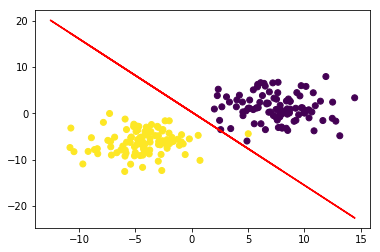

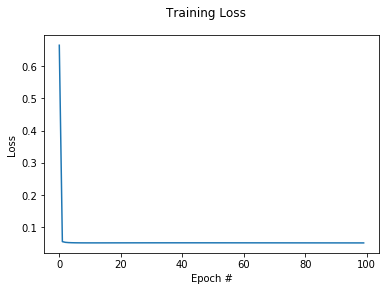

Predicted weights

[ 0.203 -1.192 -0.755]


In [31]:
# creates a set of n_samples of 2 different classifications
# Y is either class 0 or 1
(X, y) = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=2.5, random_state=25)

#define some inputs for algorithim
epochs = 100
batch_size = 8
learning_rate = 0.1

#run SGD algorithim
W, lossHistory, X = mbd_linear(X, y, epochs, batch_size, learning_rate)

#line of best fit using predicted weights
Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

# plot loss overtime
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

print("Predicted weights\n")
print(W)

### Example 1 Observations

The algorithim is able to find a W such that the error of classification is minimized. We can see from the first plot that the algorithim is able to classify the points based on their relative position to the line generated from W, however there is one noticeable outlier. Plot 2 shows that the optimal solution converges quickly for the first few itterations,then improvment slows drastically for each consecutive itteration.


## EXAMPLE 2: polynomial regression

For this example, we will test a stochastic gradient decent method to fit a polynomial curve over a set of randomized data. The randomized data will be generated around the function:

    f(x) = 1 + 0.5 * x - 0.5 x^2 - 0.2 x^3 - 0.1 x^4 
    
and will use mean squares to calculate the error term. The algorithim will minimize the error between all points by solving the coefficients of the polynomial.



### Define stochastic gradient decent algorithim for polynomial regression

In [32]:
#formats X values for polynomial of dimension dim
def polynomial_features(x, dim):
    return np.column_stack([x ** i for i in range(dim + 1)])

def mbd_poly(X, y, dim, epoch, batch_size, learning_rate):
    '''
    Input:
    X    = set of features (what we use to predict)
    y    = the label (what we want to predict)
    dim  = dimmension of polynomial to solve
    epoch = number of itterations to run
    batch_size = size of batch per itteration
    learning_rate = step size of a itteration
    
    Returns:
    W = predicted coefficients of polynomial
    lossHist = loss fxn value at each step
    '''
    
    #format input to fit polynomial of given dimmension
    X = polynomial_features(X,dim)
    
    print("[INFO] starting training...")
    #initilize random weights
    W = np.random.uniform(size=(dim+1,))
    
    #to graph effect of epoch
    lossHist = []
    
    for epoch in np.arange(0,epochs):
        #find loss of epoch
        eLoss = []
        
        #process batch
        for (batchX, batchY) in next_batch(X,y, batch_size):
            #dot product of batch of features with weight
            wBatch = batchX.dot(W)
            
            #find error difference from true dataset
            error = wBatch - batchY
      
            #find total loss from sum of squares
            loss = np.sum(error ** 2)
            eLoss.append(loss)
           
            #calulate the gradient of the batch
            gradient = batchX.T.dot(error) / batchX.shape[0]
            
            #step in the gradient direction
            W += -learning_rate * gradient
            
        #update loss history
        lossHist.append(np.average(eLoss))   
    
    return W, lossHist

### Run algorithim on randomized data

[INFO] starting training...


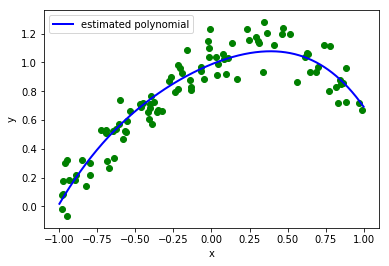

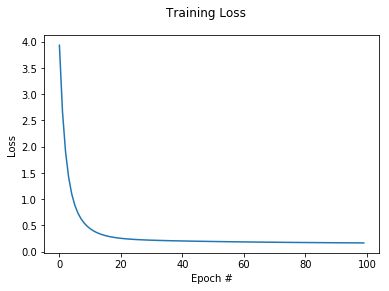

predicted polynomial coefficients
[ 0.987  0.428 -0.439 -0.091 -0.192]

actual coefficients
[1, 0.5, -0.5, -0.2, -0.1]


<Figure size 432x288 with 0 Axes>

In [33]:
np.random.seed(int(time.time()))
#fxn = 1 + 0.5 * x - 0.5 x^2 - 0.2 x^3 - 0.1 x^4
coeffs = [1, 0.5, -0.5, -0.2, -0.1]
#generate random data around the curve
x, y = polynomial_data(coeffs, 100)
#show random data

y = y.ravel()

#parameters for function
epoch = 100
dim = 4
batch_size = 16
learning_rate = 0.1

#run algorithim
W, lossHist = mbd_poly(x, y, dim, epoch, batch_size , learning_rate)

#plot prediced curve, true curve, and data
plt.scatter(x, y, color='green')
plt.xlabel("x")
plt.ylabel("y")
plot_polynomial(W, color='blue', label='estimated polynomial')
plt.legend()

#plot error
fig = plt.figure()
plt.plot(np.arange(epoch), lossHist)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

fig = plt.figure()

print("predicted polynomial coefficients")
print(W.flatten())
print("\nactual coefficients")
print(coeffs)

### Example 2 Observations

The algorithim is able to find a W such that the error of between all points near the curve is minimized. We can see from the first plot that the algorithim is able to fit a curve over the dataset that is very close to the original function. Plot 2 shows that the optimal solution converges quickly for the first few iterations,then improvement slows drastically for each consecutive iteration. We can see that the coefficients the algorithim computed are very close to the original function. Of course, the result is also highly dependent on the arrangement of the randomized data.


Quality of Writing and Mathematical Demonstration (10 points)

Communicating about mathematical ideas in written form is a challenging skill to learn.  The author shouldpay attention to writing techniques in the process of producing this paper.